In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})

In [3]:
num_CNT_Files=1
num_layers=280

layer = np.empty((num_CNT_Files,num_layers),dtype=int)
avg_field = np.empty((num_CNT_Files,num_layers),dtype=float)

file_name = np.empty(num_CNT_Files,dtype=object)

#path = '../ImpRuns/GVdot5V_NoChargeDensity/'
#path = '../ImpRuns/GVdot5V_someChargeDensity/'
#path = '../ImpRuns/Verification_XdZdot5V_NoChargeDensity/'
path = '../Exec/'

for c in range(0, num_CNT_Files):
    file_name[c] = path + 'avg_gatherField_%d.dat'%(c)

for f in range(0,num_CNT_Files):
    file = open(file_name[f])
    lst = []
    counter=0
    for line in file:     
        if (counter >= 0):
            lst += [line.split()]
        else:
            print(line)
        counter = counter + 1 
    layer[f]      = [x[0] for x in lst]
    avg_field[f]  = [x[1] for x in lst]
        

In [4]:
acc = 0.142 #nm
nring_per_unitcell = 4 #for a zigzag nanotube
axial_loc = np.empty(num_layers,dtype=float)
Y_offset = -15.0165 #nm
def get_axial_loc(r,ACC):
    y=0.
    if(r % 2 == 0):
        y = ACC
    elif (r%2 == 1):
        y = ACC/2
    return y
 
axial_loc[0]=acc

for l in range(1,num_layers):
    rID_in_unitcell = l%nring_per_unitcell   
#    print(rID_in_unitcell)
    axial_loc[l] = axial_loc[l-1] + get_axial_loc(rID_in_unitcell,acc)
    
for l in range(0,num_layers):
    axial_loc[l] += Y_offset                  
    

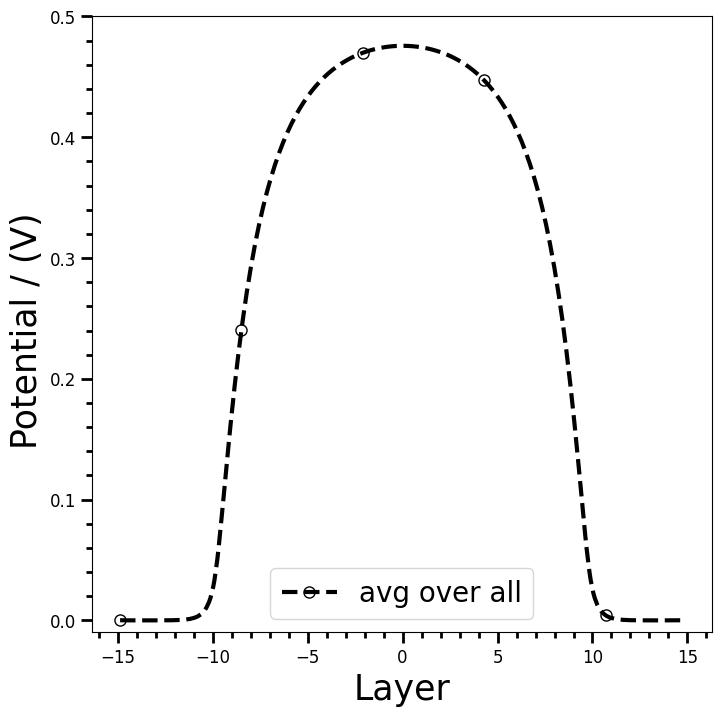

In [5]:
fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(8,8)
fig.patch.set_facecolor('white')
ax1.patch.set_facecolor('white')

ax1.plot(axial_loc, avg_field[0], 'k',linewidth=3,linestyle='dashed',
         marker='o',fillstyle='none',markevery=60,markersize=8,label=r'avg over all')

# ax1.plot(layer[1], avg_field[1], 'r',linewidth=1,linestyle='dashed',
#          marker='o',fillstyle='none',markevery=30,markersize=8,label=r'at 8th atom')

# ax1.plot(layer[2], avg_field[2], 'b',linewidth=1,linestyle='dashed',
#          marker='o',fillstyle='none',markevery=30,markersize=8,label=r'avg over 0 4 8 12 atoms')

ax1.legend(prop={'size': 20},loc='best')
ax1.tick_params(which='minor', width=2, length=4, color='k')
ax1.tick_params(which='major', width=2, length=8, color='k')

ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.legend(prop={'size': 20},loc='best')

ax1.set_ylim(-0.01,0.5)
#ax1.set_xlim(0,num_layers)

ax1.set_xlabel(r'Layer', fontsize=25)
ax1.set_ylabel(r'Potential / (V) ', fontsize=25)
plt.savefig('Layer_vs_Potential.png', bbox_inches = "tight")

